<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [2]:
# converting the data into a data frame
from io import StringIO
import urllib.request
# URL to a CSV file
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
# Fetch the content from the URL
with urllib.request.urlopen(filename) as response:
        data = response.read().decode('utf-8')
# Display the DataFrame
print(filename)


https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv


In [3]:
df = pd.read_csv(filename, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
import sklearn

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
lm.coef_

array([-821.73337832])

In [7]:
z =df [['horsepower','bore','wheel-base','compression-ratio']]
lm.fit(z, df['price'])
Yhat=lm.predict(z)

In [8]:
Yhat [0:10]

array([10318.62268667, 10318.62268667, 19787.76466585, 13367.99298367,
       14657.93676036, 14161.83923999, 16307.33830939, 16307.33830939,
       21091.93089266, 13136.36609254])

In [9]:
print (Yhat)

[10318.62268667 10318.62268667 19787.76466585 13367.99298367
 14657.93676036 14161.83923999 16307.33830939 16307.33830939
 21091.93089266 13136.36609254 13136.36609254 16521.91872807
 16521.91872807 17344.360038   26628.88603706 26628.88603706
 28953.17669558   622.98052472  6298.55170249  6298.55170249
  5664.13495799  5660.86691499 10495.08738713  5660.86691499
  5660.86691499  5660.86691499 10495.08738713 11795.34593958
 17657.29107589  1617.07711776  4375.47398842  4640.33301022
  6914.31455388  6914.31455388  7915.54745293  7909.75482094
  9316.22930888  9316.22930888  9316.22930888  9316.22930888
 11723.82813459 11596.00197626  6989.40934764  9682.63123766
 29089.77449805 29089.77449805 40123.19444779  5280.83949591
  5280.83949591  5280.83949591  5280.83949591  5251.87633596
 11321.32676041 11321.32676041 11321.32676041 16778.55076536
  9547.9125541   9547.9125541   9547.9125541   9547.9125541
 10945.72142328  9547.9125541  17096.99715911 14159.09797925
 23918.31656558 23918.316

In [10]:
import seaborn as sns

(0.0, 48174.59574177105)

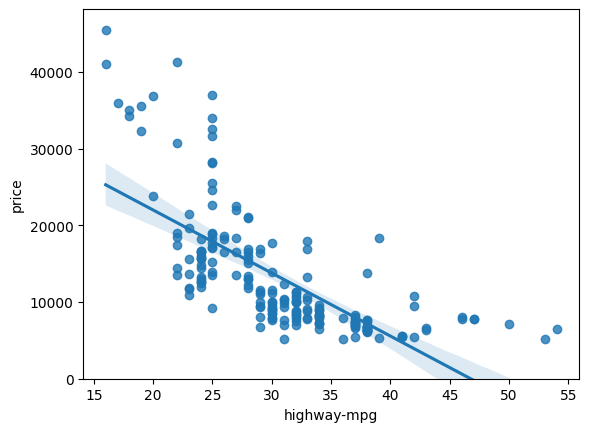

In [11]:
#Residual plot
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<ipython-input-12-922529bb8ced>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl=sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-12-922529bb8ced>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , a

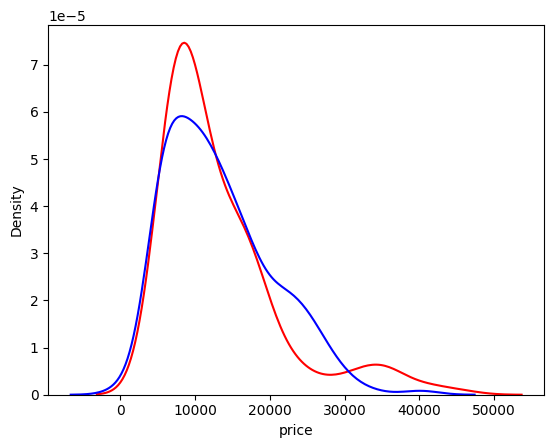

In [12]:
axl=sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=axl)
plt.show()